<a href="https://colab.research.google.com/github/AMMLRepos/iris-knn-neighbour/blob/main/IRIS_Dataset_KNN_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Type of dataset -", type(iris_dataset))

Type of dataset - <class 'sklearn.utils.Bunch'>


In [19]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [20]:
print(iris_dataset['DESCR'] + "\n")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [21]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [22]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [24]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [25]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [26]:
print("Target:\n{}".format(iris_dataset['target']))


Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state = 0)

In [28]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [29]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [30]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
print(iris_dataframe)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
..                 ...               ...                ...               ...
107                4.9               3.1                1.5               0.1
108                6.3               2.9                5.6               1.8
109                5.8               2.7                4.1               1.0
110                7.7               3.8                6.7               2.2
111                4.6               3.2                1.4               0.2

[112 rows x 4 columns]


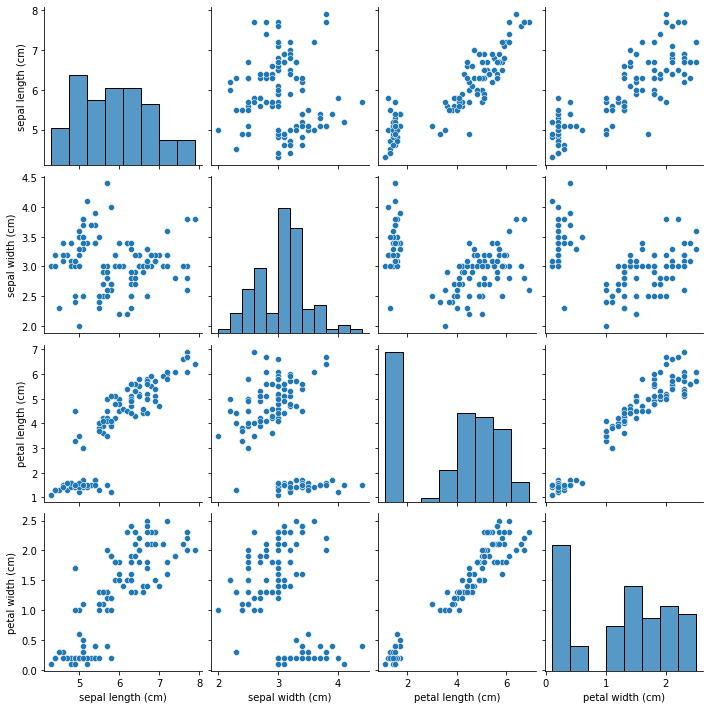

In [32]:
sns.pairplot(data = iris_dataframe);

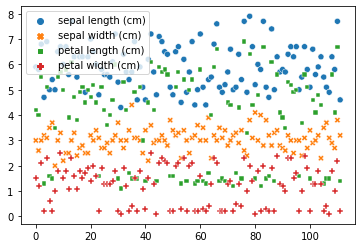

In [31]:
sns.scatterplot(data = iris_dataframe);

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [37]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape :{}".format(X_new.shape))

X_new.shape :(1, 4)


In [39]:
prediction = knn.predict(X_new)
print("Prediction : {} ".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction : [0] 
Predicted target name: ['setosa']


In [40]:
y_pred = knn.predict(X_test)
print("Test set predictions - ", y_pred)

Test set predictions -  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [41]:
print("Test set score - ", np.mean(y_pred == y_test))

Test set score -  0.9736842105263158


In [43]:
score = knn.score(X_test, y_test)
print("Test set score -", score)

Test set score - 0.9736842105263158
